<a href="https://colab.research.google.com/github/alejomd17/Econometria_Espacial_Indicadores_de_Asociacion_Espacial/blob/main/Chance_vs_Pobreza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtención de datos y organización de los data.frame

### Instalar paquetes de Mapas coropletos y LISA

In [ ]:
# Instalar paquetes de Mapas coropletos y LISA

%%time 
# Bibliotequa GDAL (Geospatial Data Abstraction Library)
!apt install gdal-bin python-gdal python3-gdal --quiet
# Instalar rtree - Requerido por Geopandas
!apt install python3-rtree --quiet
# Instalar descartes - Requerido por Geopandas
!pip install descartes --quiet
# Instalar Geopandas
!pip install git+git://github.com/geopandas/geopandas.git --quiet

# Install geovisualization libraries
!pip install folium  --quiet
!pip install plotly_express  --quiet
!pip install mapclassify --quiet

# Install Pysal - Spatial Statistics
!pip install pysal --quiet
!pip install splot --quiet

!pip install pytest --quiet
!pip install pytest-cov --quiet

Reading package lists...
Building dependency tree...
Reading state information...
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
CPU times: user 130 ms, sys: 130 ms, total: 260 ms
Wall time: 32.2 s


In [ ]:
# Cargar paquetes

# Procesamiento de datos espaciales
import pandas as pd 
import geopandas as gpd
import fiona
from shapely.geometry import Point

# Funciones matemàticas
import numpy as np

# Producciòn de gráficos y mapas
import matplotlib.pyplot as plt 
%matplotlib inline
import folium
import plotly
import plotly_express as px
import seaborn as sns

# AEDE
from libpysal.weights import Queen, attach_islands, KNN
from esda.moran import Moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from splot.esda import lisa_cluster
from pysal.explore import esda
from pysal.lib import weights
import pysal as ps



### Montar Drive

In [ ]:
# Estructura para obtener y cargar datos
# 'https://drive.google.com/uc?export=download&id=INSERTE_ID_DE_ARCHIVO_AQUÍ'

# Shape de Colombia
# https://drive.google.com/file/d/1vxwh4wDR3vydFSpIR8pm1NVFHIT3ugba/view?usp=sharing
!wget 'https://drive.google.com/uc?export=download&id=1vxwh4wDR3vydFSpIR8pm1NVFHIT3ugba' -O colMun.zip


--2020-11-29 01:21:15--  https://drive.google.com/uc?export=download&id=1vxwh4wDR3vydFSpIR8pm1NVFHIT3ugba
Resolving drive.google.com (drive.google.com)... 74.125.142.113, 74.125.142.139, 74.125.142.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hgs5n1liq6ltfgp5d6hvsa3975cc03ln/1606612875000/11543759890386875759/*/1vxwh4wDR3vydFSpIR8pm1NVFHIT3ugba?e=download [following]
--2020-11-29 01:21:16--  https://doc-08-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hgs5n1liq6ltfgp5d6hvsa3975cc03ln/1606612875000/11543759890386875759/*/1vxwh4wDR3vydFSpIR8pm1NVFHIT3ugba?e=download
Resolving doc-08-1o-docs.googleusercontent.com (doc-08-1o-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-08-1o-docs.googleusercontent.com (doc-08

In [ ]:
# Extraiga datos de archivo comprimido
!unzip colMun.zip

Archive:  colMun.zip
  inflating: colMun.dbf              
  inflating: colMun.prj              
  inflating: colMun.shp              
  inflating: colMun.shx              


In [ ]:
# Leer shape
col = gpd.read_file('colMun.shp')
col.columns.values

array(['OBJECTID', 'codigo', 'AREA_OFICI', 'ENTIDAD_TE', 'NOM_DEPART',
       'NOM_MUNICI', 'COD_DEPTO', 'SHAPE_area', 'SHAPE_len', 'DIVIPOLA',
       'geometry'], dtype=object)

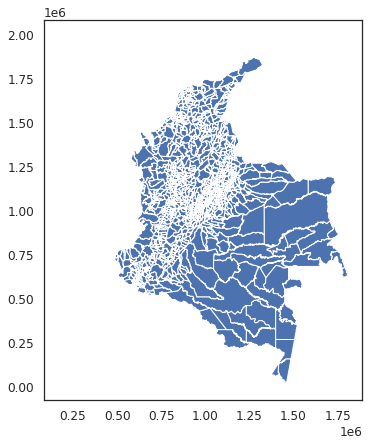

In [ ]:
# Grafique shape
col.plot()

### Cargar datos

In [ ]:
# Obtenga datos: Chance 2018
# https://drive.google.com/file/d/1gKoAmkgaYZS3vuny6K6goLok_joDu2wI/view?usp=sharing
!wget 'https://drive.google.com/uc?export=download&id=1gKoAmkgaYZS3vuny6K6goLok_joDu2wI' -O Chance2018.csv

--2020-11-29 09:05:18--  https://drive.google.com/uc?export=download&id=1gKoAmkgaYZS3vuny6K6goLok_joDu2wI
Resolving drive.google.com (drive.google.com)... 74.125.20.100, 74.125.20.101, 74.125.20.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8lp1vlfs8h2mltb7epj60i8mk0p09iqj/1606640700000/11543759890386875759/*/1gKoAmkgaYZS3vuny6K6goLok_joDu2wI?e=download [following]
--2020-11-29 09:05:18--  https://doc-14-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8lp1vlfs8h2mltb7epj60i8mk0p09iqj/1606640700000/11543759890386875759/*/1gKoAmkgaYZS3vuny6K6goLok_joDu2wI?e=download
Resolving doc-14-1o-docs.googleusercontent.com (doc-14-1o-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-14-1o-docs.googleusercontent.com (doc-14-1o-

In [ ]:
# Obtenga datos: NBI2018
# https://drive.google.com/file/d/1DgEfG2Y697grOrppfDxi3ctifBuox9ON/view?usp=sharing
!wget 'https://drive.google.com/uc?export=download&id=1DgEfG2Y697grOrppfDxi3ctifBuox9ON' -O NBI2018.csv

--2020-11-29 09:05:18--  https://drive.google.com/uc?export=download&id=1DgEfG2Y697grOrppfDxi3ctifBuox9ON
Resolving drive.google.com (drive.google.com)... 74.125.142.138, 74.125.142.102, 74.125.142.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2reji9pro6m25bfbhf0ebca03kq0v83n/1606640700000/11543759890386875759/*/1DgEfG2Y697grOrppfDxi3ctifBuox9ON?e=download [following]
--2020-11-29 09:05:18--  https://doc-14-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2reji9pro6m25bfbhf0ebca03kq0v83n/1606640700000/11543759890386875759/*/1DgEfG2Y697grOrppfDxi3ctifBuox9ON?e=download
Resolving doc-14-1o-docs.googleusercontent.com (doc-14-1o-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-14-1o-docs.googleusercontent.com (doc-14

In [ ]:
# Leer datos Chance2018
Chance2018 = pd.read_csv('Chance2018.csv',sep=';',encoding='latin')
Chance2018.columns.values

array(['ï»¿Ciudad', 'codigo', 'Recaudo2018', 'Recaudo2018_Mll',
       'VentaPerCapita2018', 'Pob_Total', 'Pob_Cab', 'Pob_Rur',
       'Agua_Tot', 'Agua_Cab', 'Agua_Rur', 'Alc_Tot', 'Alc_Cab',
       'Alc_Rur', 'Acu_Tot', 'Acu_Cab', 'Acu_Rur', 'Elec_Tot', 'Elec_Cab',
       'Ele_Rur', 'Edu_Tot', 'Edu_Cab', 'Edu_Rur', 'Emp_Tot', 'Emp_Cab',
       'Emp_Rur', 'PIB', 'PIB_PC', 'Accesos', 'Cluster'], dtype=object)

In [ ]:
# Leer datos NBI2018
NBI2018 = pd.read_csv('NBI2018.csv',sep=';',encoding='latin')
NBI2018.columns.values

array(['Código Departamento', 'Nombre Departamento', 'Código Municipio',
       'codigo', 'Nombre Municipio', 'NBI2018'], dtype=object)

In [ ]:
# Inspeccione base de datos
col.sample(3)

,OBJECTID,codigo,AREA_OFICI,ENTIDAD_TE,NOM_DEPART,NOM_MUNICI,COD_DEPTO,SHAPE_area,SHAPE_len,DIVIPOLA,geometry
287,288,25875,142.0,Cabecera Municipal,CUNDINAMARCA,VILLETA,25,1.407512e+08,58022.544228,25875,"POLYGON ((954846.867 1038832.549, 954685.121 1..."
911,915,54174,1172.0,Cabecera Municipal,NORTE DE SANTANDER,CHITAGÁ,54,1.185582e+09,204203.513581,54174,"POLYGON ((1148453.967 1264695.210, 1148444.179..."
277,278,15109,111.0,Cabecera Municipal,BOYACÁ,BUENAVISTA,15,1.139463e+08,50321.761087,15109,"POLYGON ((1019805.620 1095193.428, 1019841.140..."


In [ ]:
# Inspeccione base de datos
Chance2018.sample(3)

,ï»¿Ciudad,codigo,Recaudo2018,Recaudo2018_Mll,VentaPerCapita2018,Pob_Total,Pob_Cab,Pob_Rur,Agua_Tot,Agua_Cab,Agua_Rur,Alc_Tot,Alc_Cab,Alc_Rur,Acu_Tot,Acu_Cab,Acu_Rur,Elec_Tot,Elec_Cab,Ele_Rur,Edu_Tot,Edu_Cab,Edu_Rur,Emp_Tot,Emp_Cab,Emp_Rur,PIB,PIB_PC,Accesos,Cluster
113,Uramita,5842,1.665035e+08,167,24173,6888,30.647503,69.352497,32.677487,97.51,0.0,12.41,33.19,1.98,49.41,97.51,25.26,95.94,98.10,94.86,61.388286,65.415661,59.500297,96.0,100.000000,0.000000,86,12447,3,3
62,La Ceja,5376,4.662925e+09,4663,71860,64889,84.482732,15.517268,84.683261,99.84,0.0,90.79,99.63,32.77,94.45,99.84,59.05,99.85,99.92,99.39,75.508934,70.875342,107.679244,2684.0,94.150522,5.849478,1009,15547,5,1
88,San AndrÃ©s De CuerquÃ­a,5647,2.140311e+08,214,29583,7235,39.364202,60.635798,42.987409,95.84,0.0,44.78,94.27,2.59,52.48,95.84,15.52,98.19,99.10,97.41,88.403614,83.772486,91.879701,140.0,95.714286,4.285714,84,11591,4,4


In [ ]:
# Inspeccione base de datos
NBI2018.sample(3)

,Código Departamento,Nombre Departamento,Código Municipio,codigo,Nombre Municipio,NBI2018
5,5,ANTIOQUIA,31,5031,AMALFI,22.312696
4,5,ANTIOQUIA,30,5030,AMAGÁ,9.656387
75,5,ANTIOQUIA,501,5501,OLAYA,11.769033


### Cruzar Datos

In [ ]:
### Cruzar datos ColDeficitCuantitativo2005
# Inspeccione tipos de variables
print('Tipos de columna en <<col>>\n\n', col.dtypes,'\n\n')
print('Tipos de columna en <<Chance2018>>\n\n', Chance2018.dtypes)
print('Tipos de columna en <<NBI2018>>\n\n', NBI2018.dtypes)

Tipos de columna en <<col>>

 OBJECTID        object
codigo           int64
AREA_OFICI     float64
ENTIDAD_TE      object
NOM_DEPART      object
NOM_MUNICI      object
COD_DEPTO       object
SHAPE_area     float64
SHAPE_len      float64
DIVIPOLA        object
geometry      geometry
dtype: object 


Tipos de columna en <<Chance2018>>

 ï»¿Ciudad              object
codigo                  int64
Recaudo2018           float64
Recaudo2018_Mll         int64
VentaPerCapita2018      int64
Pob_Total               int64
Pob_Cab               float64
Pob_Rur               float64
Agua_Tot              float64
Agua_Cab              float64
Agua_Rur              float64
Alc_Tot               float64
Alc_Cab               float64
Alc_Rur               float64
Acu_Tot               float64
Acu_Cab               float64
Acu_Rur               float64
Elec_Tot              float64
Elec_Cab              float64
Ele_Rur               float64
Edu_Tot               float64
Edu_Cab               float64
Edu

In [ ]:
#  Convierto 'codigo' en integer
col.codigo = col.codigo.astype('int')
col.codigo.dtypes

dtype('int64')

In [ ]:
Antioquia=col.merge(Chance2018,on='codigo',how='inner')
Antioquia=Antioquia.merge(NBI2018,on='codigo',how='inner')
Antioquia.shape

(125, 45)

In [ ]:
Antioquia.sample(3)

,OBJECTID,codigo,AREA_OFICI,ENTIDAD_TE,NOM_DEPART,NOM_MUNICI,COD_DEPTO,SHAPE_area,SHAPE_len,DIVIPOLA,geometry,ï»¿Ciudad,Recaudo2018,Recaudo2018_Mll,VentaPerCapita2018,Pob_Total,Pob_Cab,Pob_Rur,Agua_Tot,Agua_Cab,Agua_Rur,Alc_Tot,Alc_Cab,Alc_Rur,Acu_Tot,Acu_Cab,Acu_Rur,Elec_Tot,Elec_Cab,Ele_Rur,Edu_Tot,Edu_Cab,Edu_Rur,Emp_Tot,Emp_Cab,Emp_Rur,PIB,PIB_PC,Accesos,Cluster,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,NBI2018
113,1107,5761,226.0,Cabecera Municipal,ANTIOQUIA,SOPETRÁN,05,2.148051e+08,85032.372893,05761,"POLYGON ((826019.287 1211045.229, 825908.472 1...",SopetrÃ¡n,587728162.0,588,39044,15053,43.326912,56.673088,82.326556,99.26,67.882397,45.88,88.48,7.53,88.19,99.26,78.23,98.71,99.78,97.75,64.514107,48.015110,79.577223,410.0,85.121951,14.878049,201,13356,4,1,5,ANTIOQUIA,761,SOPETRÁN,11.226202
109,1103,5044,256.0,Cabecera Municipal,ANTIOQUIA,ANZÁ,05,2.565573e+08,75733.461274,05044,"POLYGON ((797364.398 1199218.212, 797766.133 1...",Anza,180191725.0,180,25705,7010,17.945792,82.054208,21.300344,99.34,0.000000,34.35,98.03,16.65,74.48,99.34,67.56,96.42,99.56,95.55,61.137163,65.337352,60.285028,127.0,92.913386,7.086614,119,16998,3,3,5,ANTIOQUIA,44,ANZA,16.144692
56,606,5150,168.0,Cabecera Municipal,ANTIOQUIA,CAROLINA,05,1.764362e+08,66423.650045,05150,"POLYGON ((872710.877 1243094.972, 872617.655 1...",Carolina,281885456.0,282,71291,3954,74.076884,25.923116,83.265667,99.70,19.305019,82.91,97.90,25.10,86.65,99.70,36.29,99.36,99.60,98.46,73.499268,38.312398,239.905035,128.0,100.000000,0.000000,195,49221,4,1,5,ANTIOQUIA,150,CAROLINA,6.204819


# Mapas Corropletos


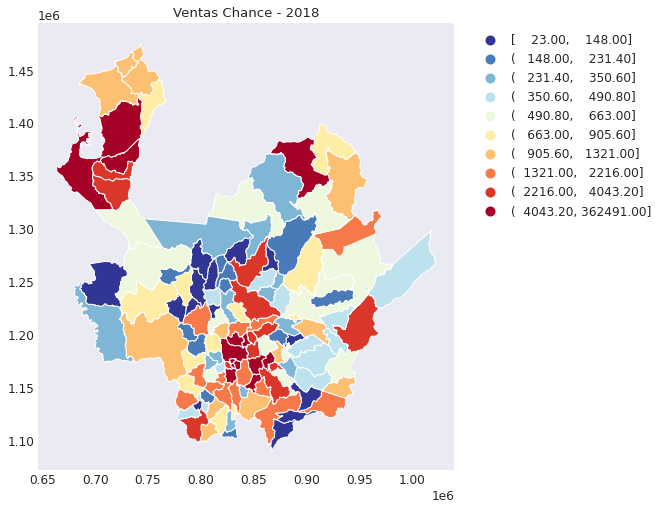

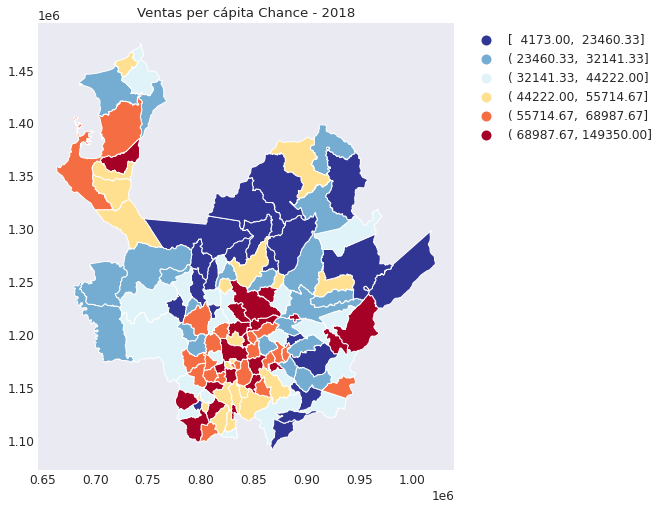

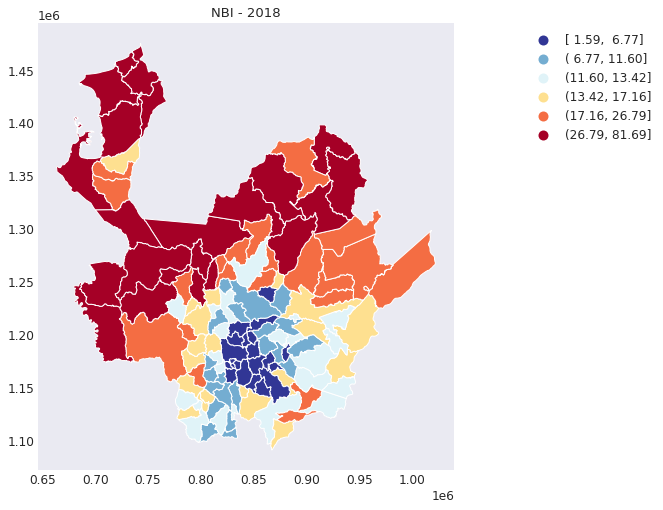

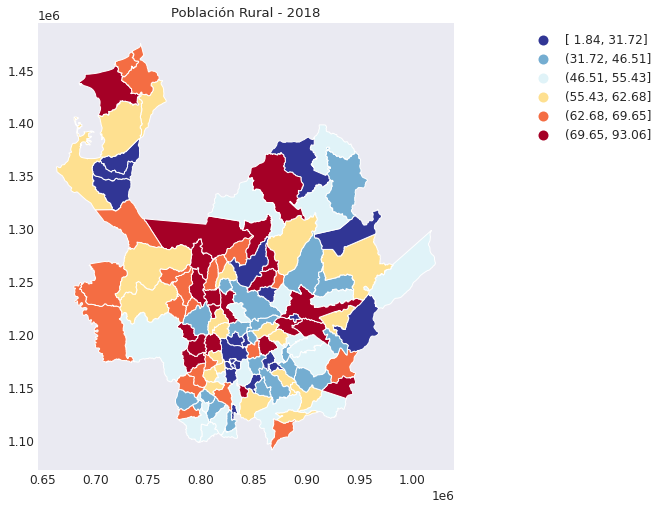

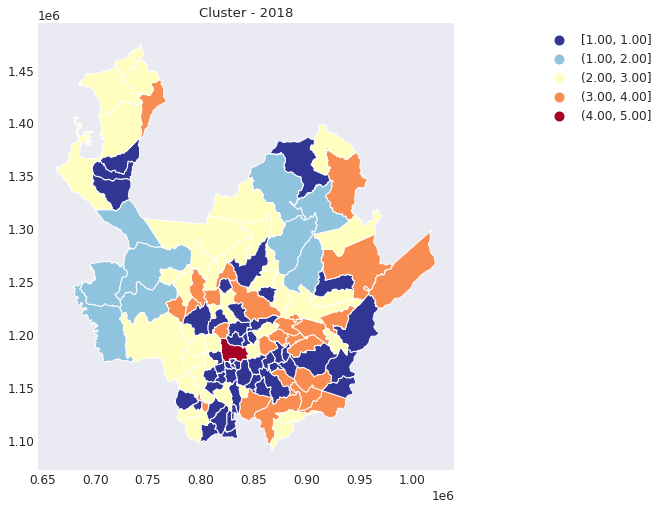

In [ ]:
### Chance2018 
with plt.style.context('seaborn-dark'):
  ax = Antioquia.plot(column='Recaudo2018_Mll',scheme='Quantiles',k=10, legend=True, cmap='RdYlBu_r',figsize=(9,9))
  plt.title('Ventas Chance - 2018')

# Defina ubicación de leyenda
  leg = ax.get_legend()
  leg.set_bbox_to_anchor((1.5,1))
  plt.tight_layout()

### Chance2018 per cápita
with plt.style.context('seaborn-dark'):
  aax = Antioquia.plot(column='VentaPerCapita2018',scheme='Quantiles',k=6, legend=True, cmap='RdYlBu_r',figsize=(9,9))
  plt.title('Ventas per cápita Chance - 2018')

# Defina ubicación de leyenda
  leg = aax.get_legend()
  leg.set_bbox_to_anchor((1.5,1))
  plt.tight_layout()

### NBI2018
with plt.style.context('seaborn-dark'):
  bx = Antioquia.plot(column='NBI2018',scheme='Quantiles',k=6, legend=True, cmap='RdYlBu_r', figsize=(9,9))
  plt.title('NBI - 2018')

# Defina ubicación de leyenda
  leg = bx.get_legend()
  leg.set_bbox_to_anchor((1.5,1))
  plt.tight_layout()

### Pob_Rur
with plt.style.context('seaborn-dark'):
  bx = Antioquia.plot(column='Pob_Rur',scheme='Quantiles',k=6, legend=True, cmap='RdYlBu_r', figsize=(9,9))
  plt.title('Población Rural - 2018')

# Defina ubicación de leyenda
  leg = bx.get_legend()
  leg.set_bbox_to_anchor((1.5,1))
  plt.tight_layout()

### Pob_Rur
with plt.style.context('seaborn-dark'):
  bx = Antioquia.plot(column='Cluster',scheme='Quantiles',k=5, legend=True, cmap='RdYlBu_r', figsize=(9,9))
  plt.title('Cluster - 2018')

# Defina ubicación de leyenda
  leg = bx.get_legend()
  leg.set_bbox_to_anchor((1.5,1))
  plt.tight_layout()

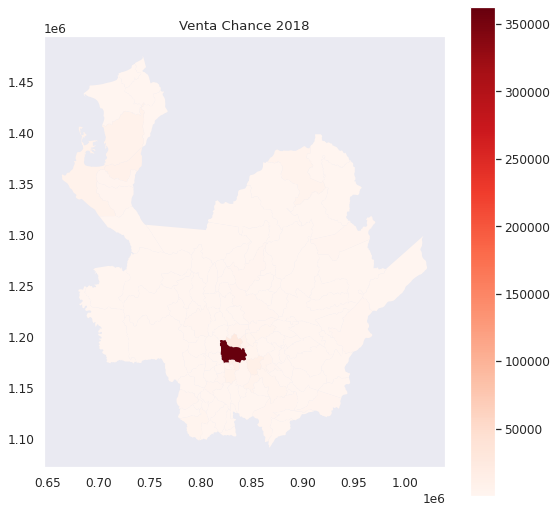

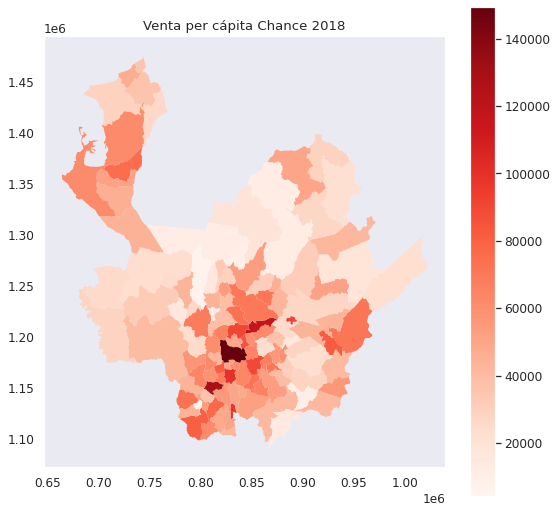

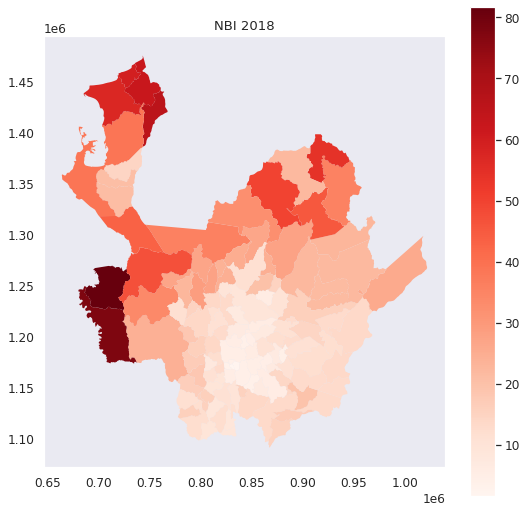

In [ ]:
with sns.axes_style('dark'):
 Antioquia.plot(column='Recaudo2018_Mll',cmap='Reds',
          legend=True, edgecolor='None',figsize=(9,9))
 plt.title('Venta Chance 2018')

 Antioquia.plot(column='VentaPerCapita2018',cmap='Reds',
          legend=True, edgecolor='None',figsize=(9,9))
 plt.title('Venta per cápita Chance 2018')

 Antioquia.plot(column='NBI2018',cmap='Reds',
          legend=True, edgecolor='None',figsize=(9,9))
 plt.title('NBI 2018')

Tanto para el Deficit Cuantitativo de Vivienda como para la Tasa de Mortalidad Infantil se observa un alto porcentaje en la zona oriente, sur y nororiente, indicando lugares con altas difícultades sociales en materia de vivienda y mortalidad infantil, siendo así la posibilidad de causalidad entre estas. Dichas regiones equivalen a Arauca, Meta y Casanare.


Mientras que en el centro de la región en el noroccidente se ve una mejor calidad de vida, antes porcentajes más bajos de estas variables sobre todo en la región Cundinamarca y Boyacá, que pertenecen al centro del país y que por su política y economía tan centralizado refuerzan esta condición.

# Matriz de pesos espaciales

In [ ]:
Antioquia.index # Inspeccione el índice o identificador interno de fila

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            115, 116, 117, 118, 119, 120, 121, 122, 123, 124],
           dtype='int64', length=125)

In [ ]:
Antioquia.sort_values('codigo',ascending=True,inplace=True) # Ordene de manera ascendente
Antioquia.set_index('codigo',drop=False,inplace=True) # Establezca una variable de 
              # de los datos como el índice, pero consérvela como una columna.
Antioquia.index # Inspeccione el índice

Int64Index([5001, 5002, 5004, 5021, 5030, 5031, 5034, 5036, 5038, 5040,
            ...
            5854, 5856, 5858, 5861, 5873, 5885, 5887, 5890, 5893, 5895],
           dtype='int64', name='codigo', length=125)

In [ ]:
# Matriz de pesos espaciales tipo Reina
wqs = Queen.from_dataframe(Antioquia,idVariable='codigo') # Genere vecindades tipo Reina
wqs.transform = 'r' # Genere pesos espaciales estandarizados por fila
print('Matriz W',wqs)
print('\nproporción enlaces no nulos', "%.3f"%wqs.pct_nonzero,'\n')


Matriz W <libpysal.weights.contiguity.Queen object at 0x7f3e7f6d8748>

proporción enlaces no nulos 4.237 



In [ ]:
# Inspeccione los pesos de Turbo (divipola==05847)
wqs[5847]

{5004: 0.125,
 5044: 0.125,
 5093: 0.125,
 5125: 0.125,
 5209: 0.125,
 5284: 0.125,
 5642: 0.125,
 5873: 0.125}

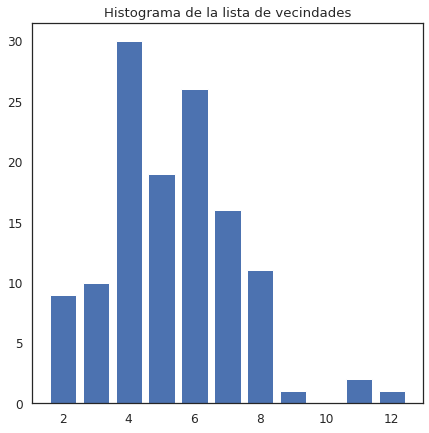

In [ ]:
with sns.axes_style('white'):
 hist_wqs = np.array(wqs.histogram,ndmin=2)
 plt.bar(hist_wqs[:,0],hist_wqs[:,1])
 plt.title('Histograma de la lista de vecindades')

La cantidad más frecuente de vecindades se encuentran en un rango entre 4 y 6 vecinos. Tomando en cuenta el criterio "reina" con el que se está llevando a cabo estos análisis.

In [ ]:
# Rezago espacial
Antioquia['lag_Recaudo2018_Mll'] = weights.lag_spatial(wqs, Antioquia['Recaudo2018_Mll'])
Antioquia['lag_VentaPerCapita2018'] = weights.lag_spatial(wqs, Antioquia['VentaPerCapita2018'])
Antioquia['lag_NBI2018'] = weights.lag_spatial(wqs, Antioquia['NBI2018'])

# Índice de Moran


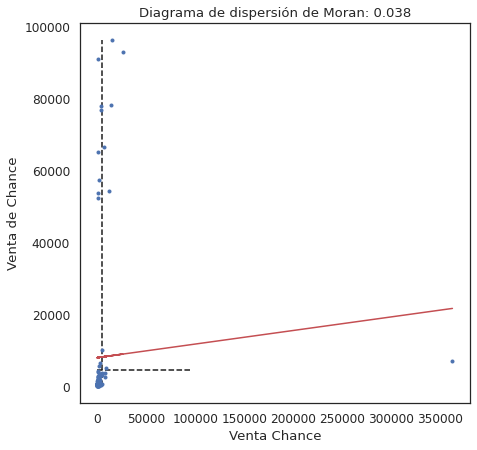

In [ ]:
# Diagrama de dispersión de Moran 
# Ventas Chance 2018
sns.set(style='white', palette="deep", font_scale=1.1, rc={"figure.figsize": [7, 7]})

b, a = np.polyfit(Antioquia.Recaudo2018_Mll, Antioquia.lag_Recaudo2018_Mll, 1)

plt.plot(Antioquia['Recaudo2018_Mll'],Antioquia['lag_Recaudo2018_Mll'],'.')

# dashed vert at mean of the price
plt.vlines(Antioquia.Recaudo2018_Mll.mean(), 
           Antioquia.lag_Recaudo2018_Mll.min(), Antioquia.lag_Recaudo2018_Mll.max(),
           linestyle='--')
# dashed horizontal at mean of lagged price
plt.hlines(Antioquia.Recaudo2018_Mll.mean(), 
           Antioquia.lag_Recaudo2018_Mll.min(), Antioquia.lag_Recaudo2018_Mll.max(), 
           linestyle='--')

# red line of best fit using global I as slope
plt.plot(Antioquia.Recaudo2018_Mll, a + b*Antioquia.Recaudo2018_Mll, 'r')
plt.title('Diagrama de dispersión de Moran: ' + str(b.round(3)) )
plt.ylabel('Venta de Chance')
plt.xlabel('Venta Chance')
plt.show()

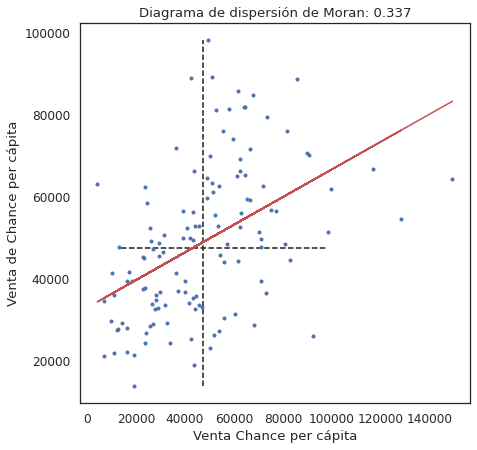

In [ ]:
# Diagrama de dispersión de Moran 
# Ventas Chance 2018
sns.set(style='white', palette="deep", font_scale=1.1, rc={"figure.figsize": [7, 7]})

b, a = np.polyfit(Antioquia.VentaPerCapita2018, Antioquia.lag_VentaPerCapita2018, 1)

plt.plot(Antioquia['VentaPerCapita2018'],Antioquia['lag_VentaPerCapita2018'],'.')

# dashed vert at mean of the price
plt.vlines(Antioquia.VentaPerCapita2018.mean(), 
           Antioquia.lag_VentaPerCapita2018.min(), Antioquia.lag_VentaPerCapita2018.max(),
           linestyle='--')
# dashed horizontal at mean of lagged price
plt.hlines(Antioquia.VentaPerCapita2018.mean(), 
           Antioquia.lag_VentaPerCapita2018.min(), Antioquia.lag_VentaPerCapita2018.max(), 
           linestyle='--')

# red line of best fit using global I as slope
plt.plot(Antioquia.VentaPerCapita2018, a + b*Antioquia.VentaPerCapita2018, 'r')
plt.title('Diagrama de dispersión de Moran: ' + str(b.round(3)) )
plt.ylabel('Venta de Chance per cápita')
plt.xlabel('Venta Chance per cápita')
plt.show()

El diagrama de dispersión encuentra un alto agrupamiento en los recuadros de bajo-bajo y alto-alto, con alguna particularidad en el bajo-alto, lo cual me demuestra una dependencia espacial positiva y que tiende a ser significativa, lo cual se demostrará con el I de Moran de esta variable.

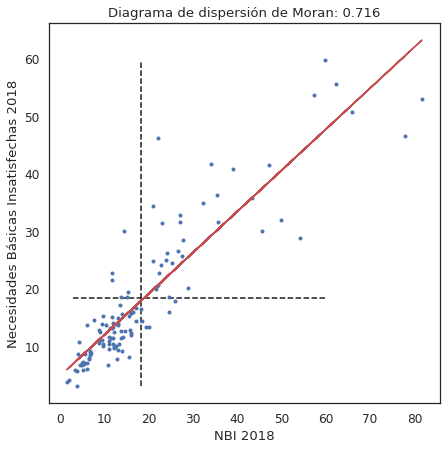

In [ ]:
# Tasa Mortalidad Infantil 2016
sns.set(style='white', palette="deep", font_scale=1.1, rc={"figure.figsize": [7, 7]})

b, a = np.polyfit(Antioquia.NBI2018, Antioquia.lag_NBI2018, 1)

plt.plot(Antioquia['NBI2018'],Antioquia['lag_NBI2018'],'.')

# dashed vert at mean of the price
plt.vlines(Antioquia.NBI2018.mean(), 
           Antioquia.lag_NBI2018.min(), Antioquia.lag_NBI2018.max(),
           linestyle='--')
# dashed horizontal at mean of lagged price
plt.hlines(Antioquia.NBI2018.mean(), 
           Antioquia.lag_NBI2018.min(), Antioquia.lag_NBI2018.max(), 
           linestyle='--')

# red line of best fit using global I as slope
plt.plot(Antioquia.NBI2018, a + b*Antioquia.NBI2018, 'r')
plt.title('Diagrama de dispersión de Moran: ' + str(b.round(3)) )
plt.ylabel('Necesidades Básicas Insatisfechas 2018')
plt.xlabel('NBI 2018')
plt.show()

De la misma interpretación que la anterior, en este caso la mayor concentración se encuentra en la zona bajo-bajo, que da indicios de la dependencia espacial de la variable.

In [ ]:
# Índice de Moran Recaudo 2018 Mll
mi_Recaudo2018_Mll = Moran(Antioquia.Recaudo2018_Mll.fillna(100),wqs, permutations=10000)
print('Recaudo 2018 Mll - Índice de Moran :',round(mi_Recaudo2018_Mll.I, 3), '\n p-valor: ',round(mi_Recaudo2018_Mll.p_sim,5))

Recaudo 2018 Mll - Índice de Moran : 0.038 
 p-valor:  0.0018


El indice de Moran para el Deficit cuantitativo como lo teníamos previsto indica dependencia espacial postiva, además de que su valor p nos indica que es estadísticamente significativo.

Esto indica en términos generales a un nivel de confianza del 95% que en promedio el hecho que los vecinos tengan deficit cuantitativo de vivienda [incide en un 32,5% en que la variable de referencia tenga deficit cuantitativo de vivienda.] esta lectura no es precisa.

In [ ]:
# Índice de Moran Venta Chance per cápita 2018
mi_VentaPerCapita2018 = Moran(Antioquia.VentaPerCapita2018.fillna(100),wqs, permutations=10000)
print('Venta Pér Cápita - Índice de Moran :',round(mi_VentaPerCapita2018.I, 3), '\n p-valor: ',round(mi_VentaPerCapita2018.p_sim,5))

Venta Pér Cápita - Índice de Moran : 0.337 
 p-valor:  0.0001


El indice de Moran para el Deficit cuantitativo como lo teníamos previsto indica dependencia espacial positiva, además de que su valor p nos indica que es estadísticamente significativo.

Esto indica en términos generales a un nivel de confianza del 95% que en promedio el hecho que los vecinos tengan deficit cuantitativo de vivienda incide en un 47,9% en que la variable de referencia tenga tasa de mortalidad infantil.

In [ ]:
# Índice de Moran NBI 2018
mi_NBI2018 = Moran(Antioquia.NBI2018.fillna(100),wqs, permutations=10000)
print('Venta Pér Cápita - Índice de Moran :',round(mi_NBI2018.I, 3), '\n p-valor: ',round(mi_NBI2018.p_sim,5))

Venta Pér Cápita - Índice de Moran : 0.716 
 p-valor:  0.0001


Text(0.5, 1.0, 'Distribución simulada del estadístico de Moran - Ventas Chance 2018')

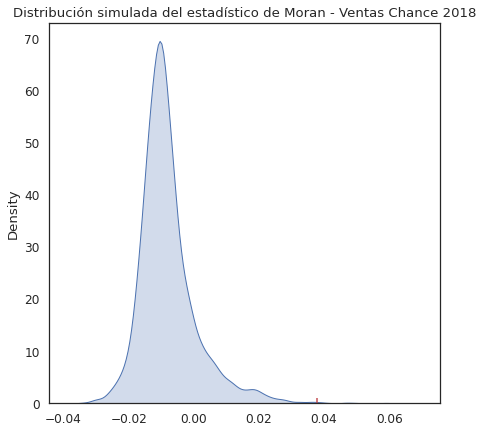

In [ ]:
mi_Recaudo2018_Mll.sim[0:5]
sns.kdeplot(mi_Recaudo2018_Mll.sim, shade=True) # Distribución simulada del Moran
plt.vlines(mi_Recaudo2018_Mll.I, 0, 1, color='r') # Moran Observado
plt.title('Distribución simulada del estadístico de Moran - Ventas Chance 2018')

Text(0.5, 1.0, 'Distribución simulada del estadístico de Moran - Venta Chance per capita 2018')

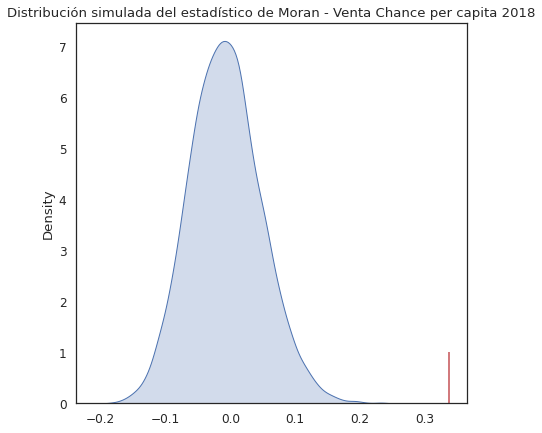

In [ ]:
mi_VentaPerCapita2018.sim[0:5]
sns.kdeplot(mi_VentaPerCapita2018.sim, shade=True) # Distribución simulada del Moran
plt.vlines(mi_VentaPerCapita2018.I, 0, 1, color='r') # Moran Observado
plt.title('Distribución simulada del estadístico de Moran - Venta Chance per capita 2018')


Text(0.5, 1.0, 'Distribución simulada del estadístico de Moran - NBI 2018')

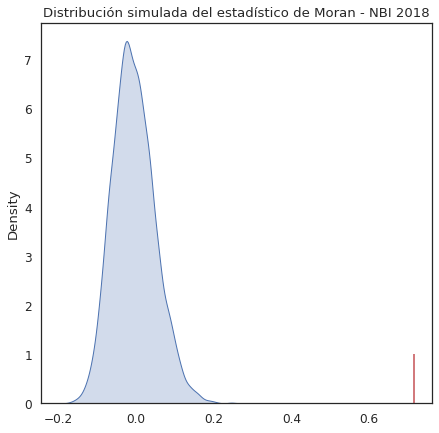

In [ ]:
mi_NBI2018.sim[0:5]
sns.kdeplot(mi_NBI2018.sim, shade=True) # Distribución simulada del Moran
plt.vlines(mi_NBI2018.I, 0, 1, color='r') # Moran Observado
plt.title('Distribución simulada del estadístico de Moran - NBI 2018')


Dado que la distribución del estadístico de Moran no es simétrica, en consecuencia la literatura ha establecido como práctica estándar juzgar su significancia estadística por media de un *test de permutaciones* (ver Anselin, 1995).

# Indicadores Locales de Asociación Espacial

In [ ]:
# calculate Moran_Local and plot
moran_loc_s_Recaudo2018_Mll = Moran_Local(Antioquia.Recaudo2018_Mll, wqs)
moran_loc_s_VentaPerCapita2018 = Moran_Local(Antioquia.VentaPerCapita2018, wqs)
moran_loc_s_NBI2018 = Moran_Local(Antioquia.NBI2018, wqs)
moran_loc_s_Agua_Tot= Moran_Local(Antioquia.Agua_Tot, wqs)
moran_loc_s_Alc_Tot = Moran_Local(Antioquia.Alc_Tot, wqs)
moran_loc_s_Acu_Tot = Moran_Local(Antioquia.Acu_Tot, wqs)
moran_loc_s_Elec_Tot = Moran_Local(Antioquia.Elec_Tot, wqs)
moran_loc_s_Edu_Tot = Moran_Local(Antioquia.Edu_Tot, wqs)
moran_loc_s_Emp_Tot = Moran_Local(Antioquia.Emp_Tot, wqs)
moran_loc_s_PIB_PC = Moran_Local(Antioquia.PIB_PC, wqs)
moran_loc_s_Accesos = Moran_Local(Antioquia.Accesos, wqs)
moran_loc_s_Pob_Cab = Moran_Local(Antioquia.Pob_Cab, wqs)
moran_loc_s_Pob_Rur= Moran_Local(Antioquia.Pob_Rur, wqs)
moran_loc_s_Pob_Clus= Moran_Local(Antioquia.Cluster, wqs)

In [ ]:
# Clusters
moran_loc_s_Recaudo2018_Mll.q

array([1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 1, 3, 3, 3, 4, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
# Clusters
moran_loc_s_VentaPerCapita2018.q

array([1, 1, 3, 3, 1, 3, 1, 1, 2, 3, 4, 2, 1, 3, 3, 1, 1, 2, 1, 2, 1, 4,
       3, 3, 3, 3, 1, 3, 3, 4, 2, 1, 1, 1, 4, 2, 4, 3, 3, 1, 1, 3, 1, 1,
       3, 1, 1, 1, 3, 3, 1, 2, 3, 3, 1, 4, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1,
       3, 2, 1, 1, 3, 3, 3, 2, 3, 2, 4, 3, 1, 4, 2, 4, 3, 1, 1, 3, 1, 2,
       3, 3, 3, 1, 4, 3, 3, 1, 2, 3, 3, 2, 1, 1, 2, 1, 3, 3, 2, 1, 3, 2,
       1, 3, 4, 3, 3, 3, 1, 4, 1, 3, 3, 4, 3, 3, 3])

In [ ]:
# Clusters
moran_loc_s_NBI2018.q

array([3, 3, 2, 3, 3, 1, 3, 3, 4, 1, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 4, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 4, 3, 1, 3, 3,
       1, 3, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3,
       4, 3, 4, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3,
       3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 2, 3, 4, 1])

In [ ]:
# P valores
moran_loc_s_Recaudo2018_Mll.p_sim 

array([0.001, 0.312, 0.199, 0.099, 0.247, 0.084, 0.142, 0.012, 0.414,
       0.094, 0.002, 0.246, 0.082, 0.202, 0.439, 0.112, 0.496, 0.263,
       0.005, 0.318, 0.29 , 0.103, 0.272, 0.087, 0.422, 0.293, 0.137,
       0.298, 0.001, 0.378, 0.289, 0.046, 0.156, 0.357, 0.291, 0.13 ,
       0.23 , 0.489, 0.381, 0.272, 0.001, 0.013, 0.236, 0.045, 0.308,
       0.339, 0.003, 0.37 , 0.022, 0.233, 0.177, 0.324, 0.295, 0.02 ,
       0.003, 0.1  , 0.023, 0.375, 0.001, 0.004, 0.303, 0.448, 0.146,
       0.003, 0.384, 0.174, 0.011, 0.484, 0.101, 0.272, 0.178, 0.202,
       0.435, 0.152, 0.156, 0.28 , 0.402, 0.01 , 0.451, 0.063, 0.345,
       0.215, 0.302, 0.003, 0.015, 0.001, 0.026, 0.387, 0.299, 0.06 ,
       0.345, 0.004, 0.341, 0.409, 0.11 , 0.061, 0.091, 0.124, 0.016,
       0.131, 0.294, 0.085, 0.458, 0.316, 0.312, 0.195, 0.232, 0.202,
       0.025, 0.378, 0.436, 0.155, 0.245, 0.125, 0.056, 0.18 , 0.244,
       0.157, 0.364, 0.287, 0.227, 0.034, 0.193, 0.29 , 0.467])

In [ ]:
# P valores
moran_loc_s_VentaPerCapita2018.p_sim

array([0.005, 0.208, 0.218, 0.308, 0.002, 0.05 , 0.424, 0.005, 0.361,
       0.007, 0.009, 0.299, 0.28 , 0.32 , 0.13 , 0.169, 0.285, 0.146,
       0.001, 0.319, 0.438, 0.192, 0.059, 0.092, 0.035, 0.206, 0.052,
       0.163, 0.001, 0.423, 0.41 , 0.172, 0.061, 0.468, 0.017, 0.342,
       0.105, 0.208, 0.169, 0.048, 0.001, 0.003, 0.036, 0.049, 0.194,
       0.018, 0.001, 0.004, 0.019, 0.114, 0.012, 0.422, 0.462, 0.084,
       0.003, 0.058, 0.002, 0.115, 0.013, 0.001, 0.084, 0.189, 0.084,
       0.001, 0.35 , 0.208, 0.053, 0.241, 0.139, 0.176, 0.075, 0.167,
       0.141, 0.46 , 0.275, 0.495, 0.362, 0.001, 0.298, 0.226, 0.324,
       0.075, 0.188, 0.001, 0.014, 0.003, 0.081, 0.043, 0.426, 0.415,
       0.311, 0.014, 0.446, 0.197, 0.084, 0.014, 0.454, 0.191, 0.091,
       0.07 , 0.023, 0.294, 0.111, 0.394, 0.029, 0.052, 0.394, 0.067,
       0.001, 0.024, 0.004, 0.015, 0.384, 0.04 , 0.098, 0.006, 0.149,
       0.036, 0.213, 0.154, 0.147, 0.006, 0.479, 0.458, 0.022])

In [ ]:
# P valores
moran_loc_s_NBI2018.p_sim

array([0.001, 0.02 , 0.289, 0.038, 0.056, 0.206, 0.204, 0.003, 0.257,
       0.044, 0.352, 0.391, 0.147, 0.002, 0.446, 0.278, 0.03 , 0.027,
       0.011, 0.237, 0.496, 0.411, 0.202, 0.338, 0.056, 0.494, 0.002,
       0.383, 0.151, 0.243, 0.201, 0.207, 0.002, 0.312, 0.002, 0.069,
       0.402, 0.099, 0.045, 0.302, 0.002, 0.002, 0.002, 0.073, 0.02 ,
       0.043, 0.001, 0.026, 0.001, 0.348, 0.002, 0.268, 0.026, 0.429,
       0.002, 0.08 , 0.089, 0.353, 0.001, 0.012, 0.194, 0.174, 0.009,
       0.001, 0.124, 0.041, 0.423, 0.348, 0.003, 0.021, 0.003, 0.022,
       0.493, 0.003, 0.144, 0.279, 0.009, 0.03 , 0.2  , 0.5  , 0.207,
       0.414, 0.293, 0.001, 0.001, 0.109, 0.001, 0.413, 0.423, 0.076,
       0.311, 0.025, 0.438, 0.005, 0.232, 0.003, 0.013, 0.155, 0.148,
       0.001, 0.06 , 0.073, 0.069, 0.022, 0.063, 0.22 , 0.245, 0.036,
       0.039, 0.194, 0.15 , 0.16 , 0.001, 0.054, 0.073, 0.116, 0.219,
       0.3  , 0.27 , 0.009, 0.31 , 0.186, 0.318, 0.368, 0.04 ])

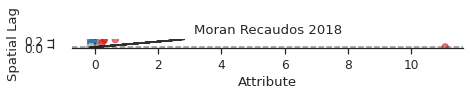

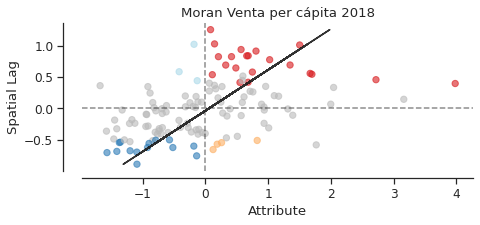

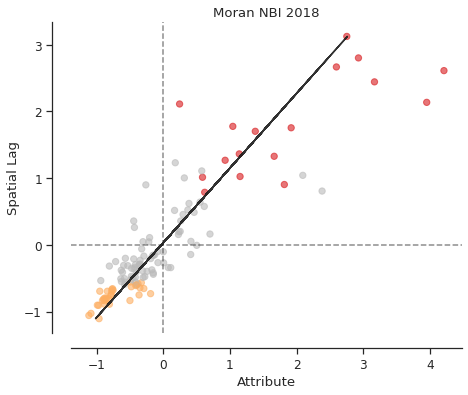

In [ ]:
# Diagrama de dispersión de Moran
with sns.axes_style("white"):
 moran_scatterplot(moran_loc_s_Recaudo2018_Mll, p=0.05)
 plt.title("Moran Recaudos 2018")
 plt.show()

with sns.axes_style("white"):
 moran_scatterplot(moran_loc_s_VentaPerCapita2018, p=0.05)
 plt.title("Moran Venta per cápita 2018")
 plt.show()

with sns.axes_style("white"):
 moran_scatterplot(moran_loc_s_NBI2018, p=0.05)
 plt.title("Moran NBI 2018")
 plt.show()

Los LISA identificados en la gráfica de dispersión nos muestra la existencia de algunos cluster de agrupameinto en los 4 cuadrantes pero preponderando los cuadrantes bajo-bajo y alto-alto, en cada una de las dos variables.

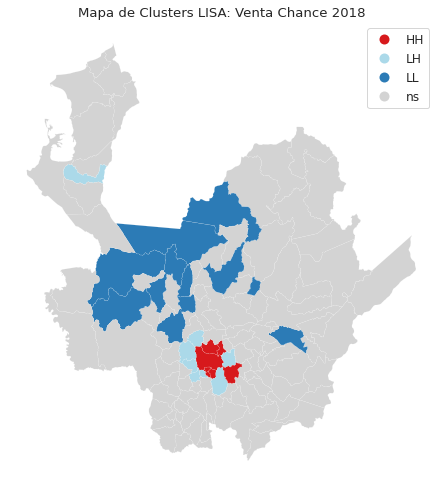

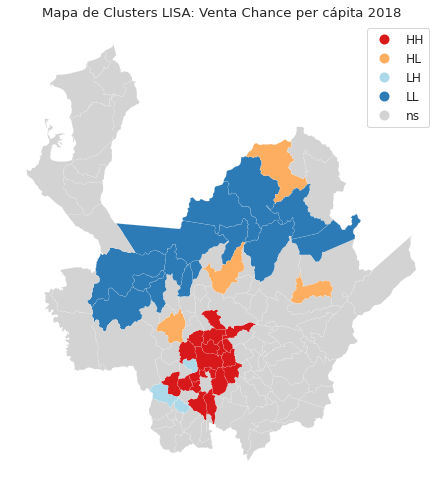

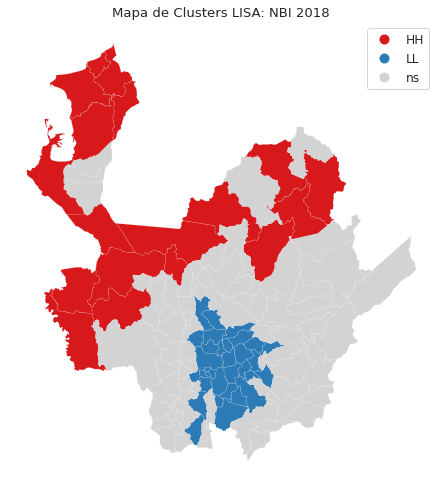

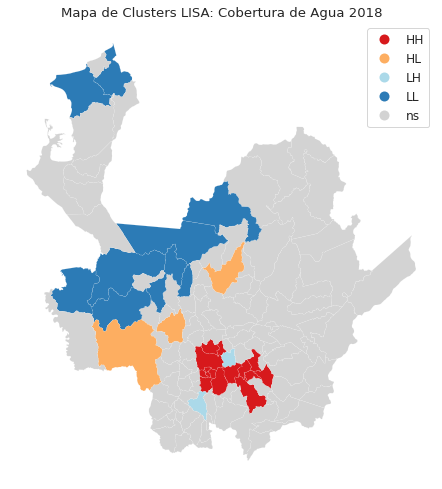

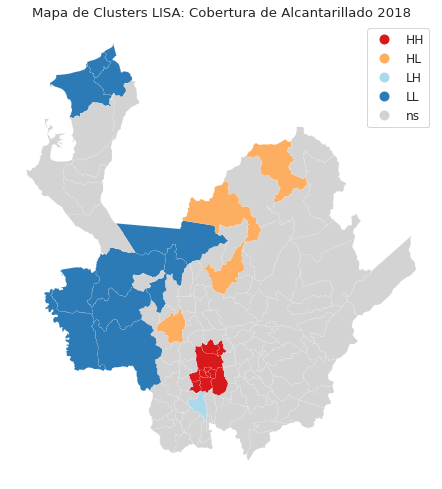

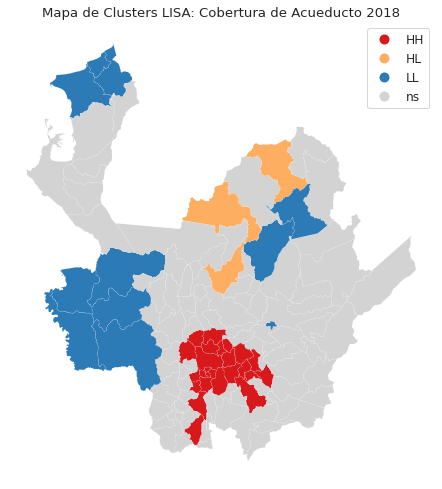

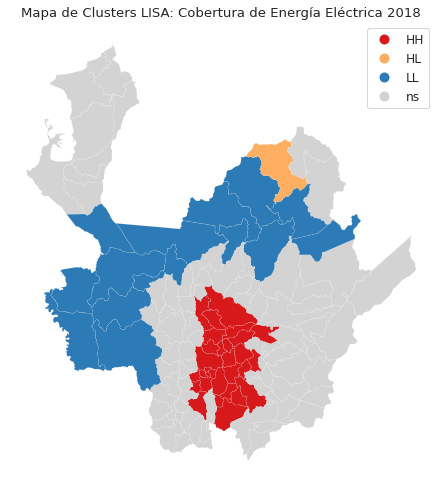

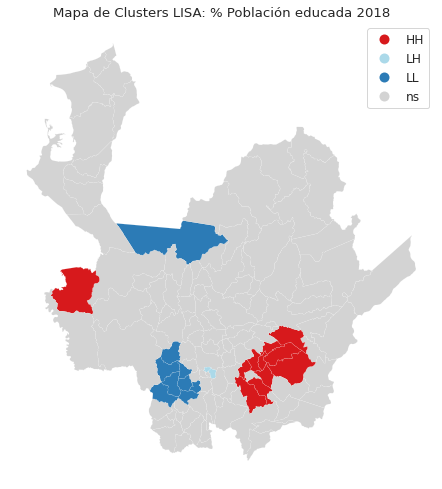

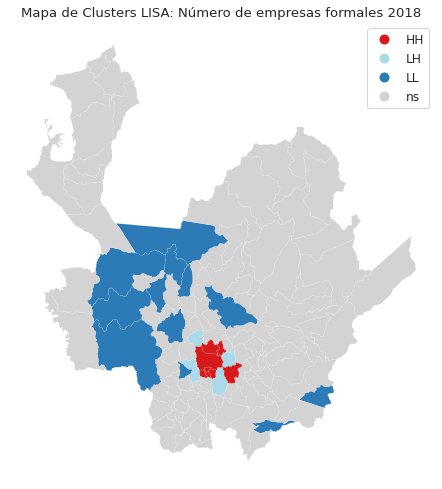

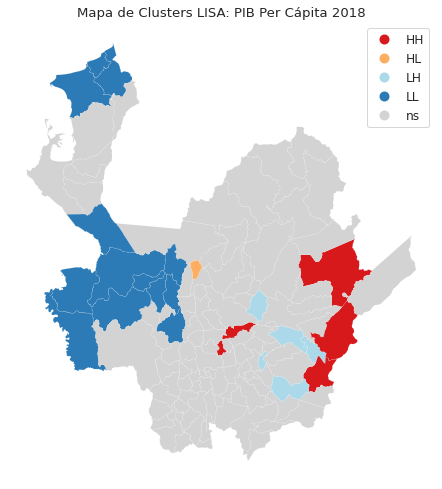

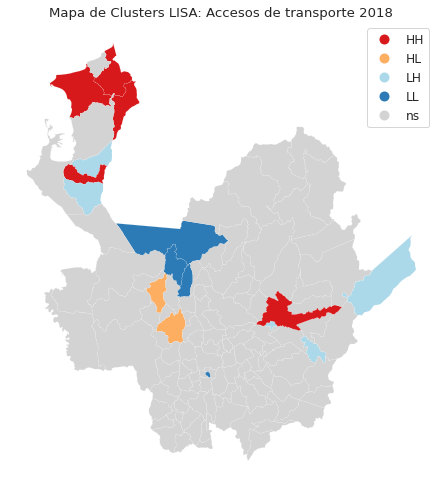

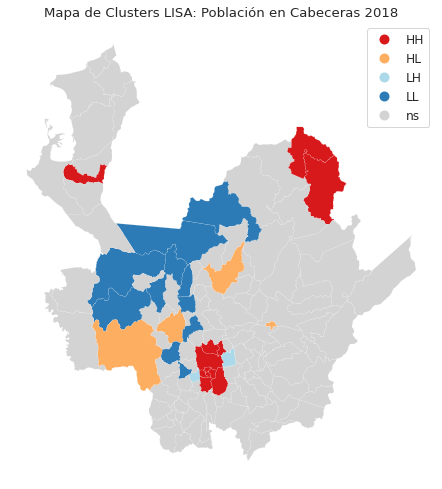

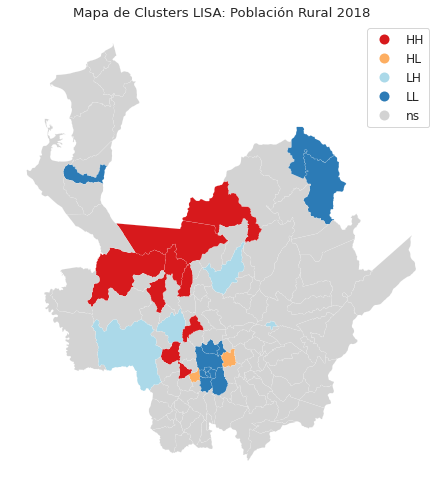

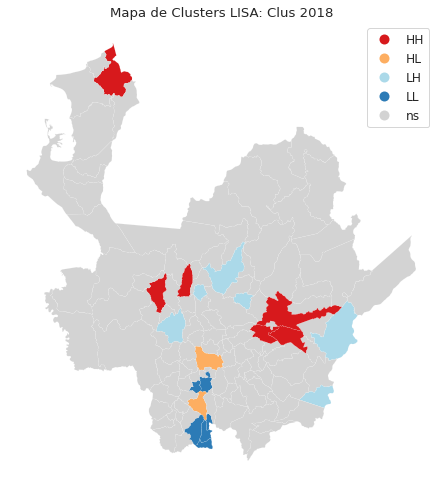

In [ ]:
# Mapa de clusters LISA
with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_Recaudo2018_Mll, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: Venta Chance 2018')
 plt.tight_layout()
 plt.show()

with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_VentaPerCapita2018, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: Venta Chance per cápita 2018')
 plt.tight_layout()
 plt.show()

with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_NBI2018, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: NBI 2018')
 plt.tight_layout()
 plt.show()
 
with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_Agua_Tot, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: Cobertura de Agua 2018')
 plt.tight_layout()
 plt.show()

with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_Alc_Tot, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: Cobertura de Alcantarillado 2018')
 plt.tight_layout()
 plt.show()

with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_Acu_Tot, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: Cobertura de Acueducto 2018')
 plt.tight_layout()
 plt.show()

with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_Elec_Tot, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: Cobertura de Energía Eléctrica 2018')
 plt.tight_layout()
 plt.show()

with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_Edu_Tot, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: % Población educada 2018')
 plt.tight_layout()
 plt.show()

with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_Emp_Tot, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: Número de empresas formales 2018')
 plt.tight_layout()
 plt.show()
 
with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_PIB_PC, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: PIB Per Cápita 2018')
 plt.tight_layout()
 plt.show()

with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_Accesos, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: Accesos de transporte 2018')
 plt.tight_layout()
 plt.show()

with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_Pob_Cab, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: Población en Cabeceras 2018')
 plt.tight_layout()
 plt.show()

with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_Pob_Rur, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: Población Rural 2018')
 plt.tight_layout()
 plt.show()

with sns.axes_style("white"):
 lisa_cluster(moran_loc_s_Pob_Clus, Antioquia, p=0.05, figsize=(7,7))
 plt.title('Mapa de Clusters LISA: Clus 2018')
 plt.tight_layout()
 plt.show()


El LISA indica el tipo de patrón que se presenta alredador del vecindario de cada unidad espacial. Por ejemplo, es posible que aunque a nivel global, el índice de Moran sugiera que existe dependencia espacial positiva, a nivel local pueden exisitir algunos vecindarios de unidades espaciales que escapen a la tendencia, y por tanto exhibir correlación negativa o no exhibir ningún tipo de correlación, o viceversa.

El mapa de clusters LISA representa en un mapa coropleto las unidades espaciales para las cuales el índice local de Moran es estadísticamente significativo, y clasificadas según los agrupamientos definidos en el diagrama de dispersión de Moran.

En ambas variables planteadas, se observan algunas concentraciones (cluster) que me indican esos LISA.

Estos cluster indican que estos lugares tienen una particularidad y que sus vecinos también tengan una misma particularidad.

Es decir, en la agrupación alto alto indica, que los municipios de referencia tengan alto deficit o mortalidad y que todos vecinos también tengan esa misma caracteristica de alto deficit.

Caso contrario cuando tengo una baja mortalidad o deficit y que todos los vecinos a mi alrededor también tengan esa condicion baja, esto se conoce como el cuadrante bajo-bajo.

Hay unos casos expecionales donde la relación es inversa, alta mortalidad o deficit y que todos los vecinos aledaños tengan baja mortalidad o pobreza. conocida como la región alta-bajo. O en su defecto en caso contrario, sería la región bajo-Alto.

# Estadísticos Bivariado de Asociación Espacial

In [ ]:
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv

Venta Chance vs NBI 2018

In [ ]:
moran_bv= Moran_BV(Antioquia.Recaudo2018_Mll, Antioquia.NBI2018,wqs)
print('Índice de Moran : Rezago Espacial Venta Chance 2018 vs. NBI 2018',round(moran_bv.I, 3), '\n p-valor: ',round(moran_bv.p_sim,5))

Índice de Moran : Rezago Espacial Venta Chance 2018 vs. NBI 2018 -0.079 
 p-valor:  0.001


La segunda variable que se provee como argumento a dicha función es la que se rezaga espacialmente, en este caso, el Deficit Cuantitativo de Vivienda.

COMENTARIO: Realmente la que se rezaga es la segunda variable en la función.

Se encontró que el estadístico bivariado de Moran es positivo y significativo. Esto significa, en este caso, que en general los municipios con alto deficit cuantitativo espacial tienen vecinos con alta tasa de mortalidad infantil, o equivalmentente, que los municipios con bajo valor de hacinamiento (deficit cuantitativo de vivienda) tienen vecinos con un baja tasa de mortalidad infantil.

Se puede encontrar la relación positiva dela incidencia que tiene el haciento sobre la mortalidad infantil.


In [ ]:
moran_bv2= Moran_BV(Antioquia.VentaPerCapita2018, Antioquia.NBI2018,wqs)
print('Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. NBI 2018',round(moran_bv2.I, 3), '\n p-valor: ',round(moran_bv2.p_sim,5))

Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. NBI 2018 -0.313 
 p-valor:  0.001


In [ ]:
moran_bv3= Moran_BV(Antioquia.VentaPerCapita2018, Antioquia.Pob_Cab,wqs)
print('Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Pob_Cab',round(moran_bv3.I, 3), '\n p-valor: ',round(moran_bv3.p_sim,5))

Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Pob_Cab 0.161 
 p-valor:  0.004


In [ ]:
moran_bv4= Moran_BV(Antioquia.VentaPerCapita2018, Antioquia.Pob_Rur,wqs)
print('Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Pob_Rur',round(moran_bv4.I, 3), '\n p-valor: ',round(moran_bv4.p_sim,5))

Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Pob_Rur -0.161 
 p-valor:  0.002


In [ ]:
moran_bv5= Moran_BV(Antioquia.VentaPerCapita2018, Antioquia.Agua_Tot,wqs)
print('Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Agua',round(moran_bv5.I, 3), '\n p-valor: ',round(moran_bv5.p_sim,5))

Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Agua 0.221 
 p-valor:  0.001


In [ ]:
moran_bv6= Moran_BV(Antioquia.VentaPerCapita2018, Antioquia.Alc_Tot,wqs)

print('Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Alcantarillado 2018',round(moran_bv6.I, 3), '\n p-valor: ',round(moran_bv6.p_sim,5))

Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Alcantarillado 2018 0.26 
 p-valor:  0.001


In [ ]:
moran_bv7= Moran_BV(Antioquia.VentaPerCapita2018, Antioquia.Acu_Tot,wqs)
print('Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Acueducto 2018',round(moran_bv7.I, 3), '\n p-valor: ',round(moran_bv7.p_sim,5))

Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Acueducto 2018 0.256 
 p-valor:  0.001


In [ ]:
moran_bv8= Moran_BV(Antioquia.VentaPerCapita2018, Antioquia.Elec_Tot,wqs)
print('Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Electricidad 2018',round(moran_bv8.I, 3), '\n p-valor: ',round(moran_bv8.p_sim,5))

Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Electricidad 2018 0.314 
 p-valor:  0.001


In [ ]:
moran_bv7= Moran_BV(Antioquia.VentaPerCapita2018, Antioquia.Edu_Tot,wqs)
print('Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Educación 2018',round(moran_bv7.I, 3), '\n p-valor: ',round(moran_bv7.p_sim,5))

Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Educación 2018 -0.038 
 p-valor:  0.278


In [ ]:
moran_bv7= Moran_BV(Antioquia.VentaPerCapita2018, Antioquia.Emp_Tot,wqs)
print('Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Empresas 2018',round(moran_bv7.I, 3), '\n p-valor: ',round(moran_bv7.p_sim,5))

Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Empresas 2018 0.152 
 p-valor:  0.007


In [ ]:
moran_bv7= Moran_BV(Antioquia.VentaPerCapita2018, Antioquia.Accesos,wqs)
print('Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Accesos 2018',round(moran_bv7.I, 3), '\n p-valor: ',round(moran_bv7.p_sim,5))

Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Accesos 2018 0.101 
 p-valor:  0.048


In [ ]:
moran_bv8= Moran_BV(Antioquia.VentaPerCapita2018, Antioquia.PIB_PC,wqs)
print('Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. PIB Per Cápita 2018',round(moran_bv8.I, 3), '\n p-valor: ',round(moran_bv8.p_sim,5))

Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. PIB Per Cápita 2018 0.089 
 p-valor:  0.075


In [ ]:
moran_loc_s_Pob_Clus

In [ ]:
moran_bv9= Moran_BV(Antioquia.VentaPerCapita2018, Antioquia.Cluster,wqs)
print('Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Cluster 2018',round(moran_bv9.I, 3), '\n p-valor: ',round(moran_bv9.p_sim,5))

Índice de Moran : Rezago Espacial Venta Chance per cápita 2018 vs. Cluster 2018 -0.177 
 p-valor:  0.002


/usr/local/lib/python3.6/dist-packages/splot/_viz_esda_mpl.py:140: UserWarning:

`p` is only used for plotting `esda.moran.Moran_Local`
or `Moran_Local_BV` objects



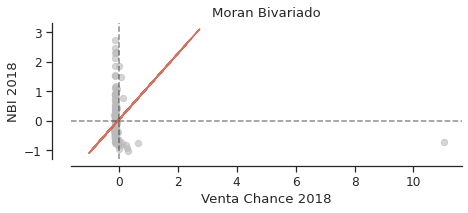

/usr/local/lib/python3.6/dist-packages/splot/_viz_esda_mpl.py:140: UserWarning:

`p` is only used for plotting `esda.moran.Moran_Local`
or `Moran_Local_BV` objects



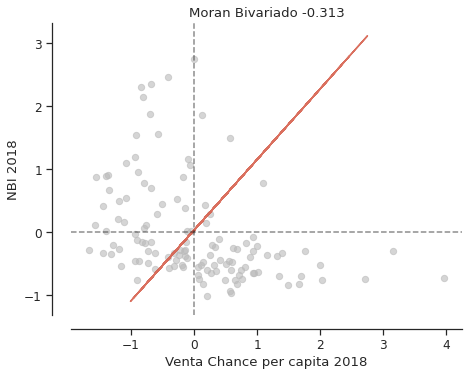

In [ ]:
# Diagrama de dispersión de Moran
with sns.axes_style("white"):
 moran_scatterplot(moran_bv, p=0.05)
 plt.title("Moran Bivariado")
 plt.xlabel('Venta Chance 2018')
 plt.ylabel('NBI 2018')
 plt.show()

with sns.axes_style("white"):
 moran_scatterplot(moran_bv2, p=0.05)
 plt.title("Moran Bivariado " + str(round(moran_bv2.I,3)))
 plt.xlabel('Venta Chance per capita 2018')
 plt.ylabel('NBI 2018')
 plt.show()

Gráficamente se puede identificar la relación entre estás dos variables, donde se evidencia el deficit habitacional está relacionada con la tasa de mortalidad infantil.

Esto indica que los municipios con alto deficit cuantitativo espacial, tienen vecinos con alta tasa de mortalidad infantil.
Dependencia espacial positiva.



Se puede identificar la tendecia espacial positiva entre estas dos variables y su incidencia. Por su pendiente positiva.

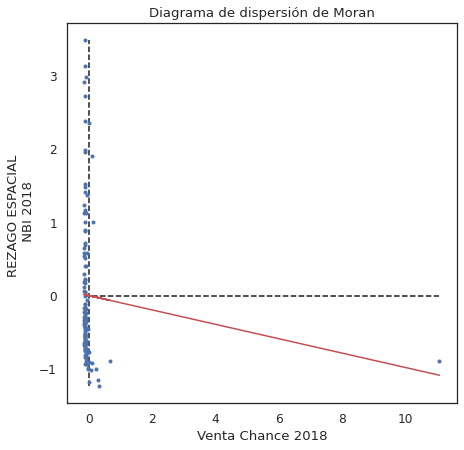

In [ ]:
# Rezago espacial
from sklearn import preprocessing
x, y = preprocessing.scale(Antioquia.Recaudo2018_Mll), preprocessing.scale(Antioquia.lag_NBI2018)

# Diagrama de dispersión de Moran bivariado
sns.set(style='white', palette="deep", font_scale=1.1, rc={"figure.figsize": [7, 7]})

b, a = np.polyfit(x, y, 1)

plt.plot(x, y, '.')

# dashed vert at mean of the price
plt.vlines(x.mean(), 
           y.min(), y.max(),
           linestyle='--')
# dashed horizontal at mean of lagged price
plt.hlines(y.mean(), 
           x.min(),x.max(), 
           linestyle='--')

# red line of best fit using global I as slope
plt.plot(x, a + b*x, 'r')
plt.title('Diagrama de dispersión de Moran')
plt.ylabel('REZAGO ESPACIAL \n NBI 2018')
plt.xlabel('Venta Chance 2018')
plt.show()

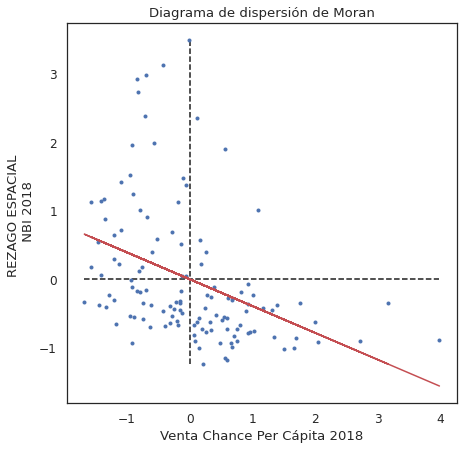

In [ ]:
# Rezago espacial
from sklearn import preprocessing
x, y = preprocessing.scale(Antioquia.VentaPerCapita2018), preprocessing.scale(Antioquia.lag_NBI2018)

# Diagrama de dispersión de Moran bivariado
sns.set(style='white', palette="deep", font_scale=1.1, rc={"figure.figsize": [7, 7]})

b, a = np.polyfit(x, y, 1)

plt.plot(x, y, '.')

# dashed vert at mean of the price
plt.vlines(x.mean(), 
           y.min(), y.max(),
           linestyle='--')
# dashed horizontal at mean of lagged price
plt.hlines(y.mean(), 
           x.min(),x.max(), 
           linestyle='--')

# red line of best fit using global I as slope
plt.plot(x, a + b*x, 'r')
plt.title('Diagrama de dispersión de Moran')
plt.ylabel('REZAGO ESPACIAL \n NBI 2018')
plt.xlabel('Venta Chance Per Cápita 2018')
plt.show()

El diagrama de dispersión da muestras la dependencia que existe entre las dos variables, municipios con altas tasas de deficit habitacional tienen vecinos con galtas tasas de mortalidad infantil, o al revés, vecinos con bajas tasas de deficit habitacional tienen vecinos con baja tasa de mortalidad infantil.

Acá su indicador tiene una concentración en la zona inferior de los cuadrantes. (Bajo-Bajo).

# Lisa Bivariados

COMENTARIO: no se necesita rezagar espacialemtne las variables que se proveen como argumento a la función `Moran_Local_BV`, a no ser que se persiga algún propósito particular con este proceder. La función `Moran_Local_BV` recibe como argumentos las variables sin rezagar, pues esta función calcula internamente el rezago espacial requerido.

In [ ]:
moran_loc_bv = Moran_Local_BV(Antioquia.Recaudo2018_Mll, Antioquia.NBI2018, wqs)
moran_loc_bv2 = Moran_Local_BV(Antioquia.VentaPerCapita2018, Antioquia.NBI2018, wqs)
moran_Loc_bv4= Moran_Local_BV(Antioquia.VentaPerCapita2018, Antioquia.Pob_Rur,wqs)
moran_Loc_bv5= Moran_Local_BV(Antioquia.VentaPerCapita2018, Antioquia.Agua_Tot,wqs)
moran_Loc_bv6= Moran_Local_BV(Antioquia.VentaPerCapita2018, Antioquia.Alc_Tot,wqs)
moran_Loc_bv7= Moran_Local_BV(Antioquia.VentaPerCapita2018, Antioquia.Acu_Tot,wqs)
moran_Loc_bv8= Moran_Local_BV(Antioquia.VentaPerCapita2018, Antioquia.Elec_Tot,wqs)
moran_Loc_bv9= Moran_Local_BV(Antioquia.VentaPerCapita2018, Antioquia.Edu_Tot,wqs)
moran_Loc_bv10= Moran_Local_BV(Antioquia.VentaPerCapita2018, Antioquia.Emp_Tot,wqs)
moran_Loc_bv11= Moran_Local_BV(Antioquia.VentaPerCapita2018, Antioquia.Accesos,wqs)
moran_Loc_bv12= Moran_Local_BV(Antioquia.VentaPerCapita2018, Antioquia.PIB_PC,wqs)
moran_Loc_bv13= Moran_Local_BV(Antioquia.VentaPerCapita2018, Antioquia.Cluster,wqs)

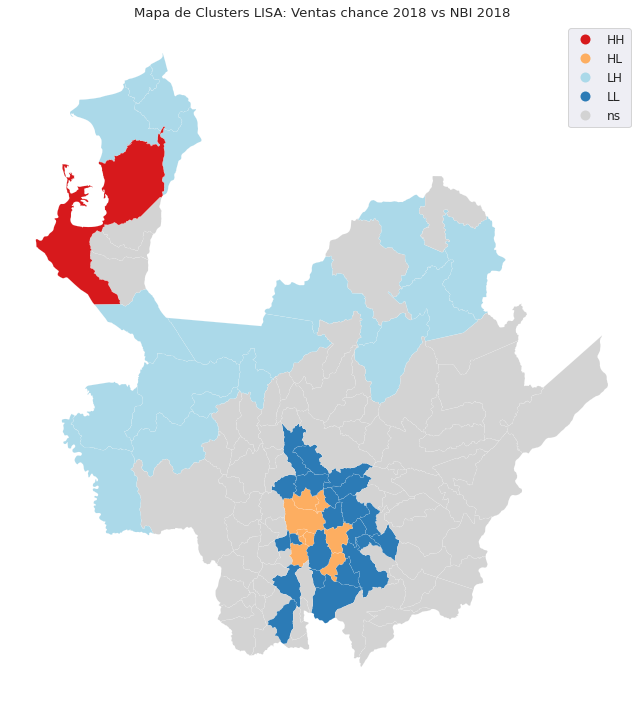

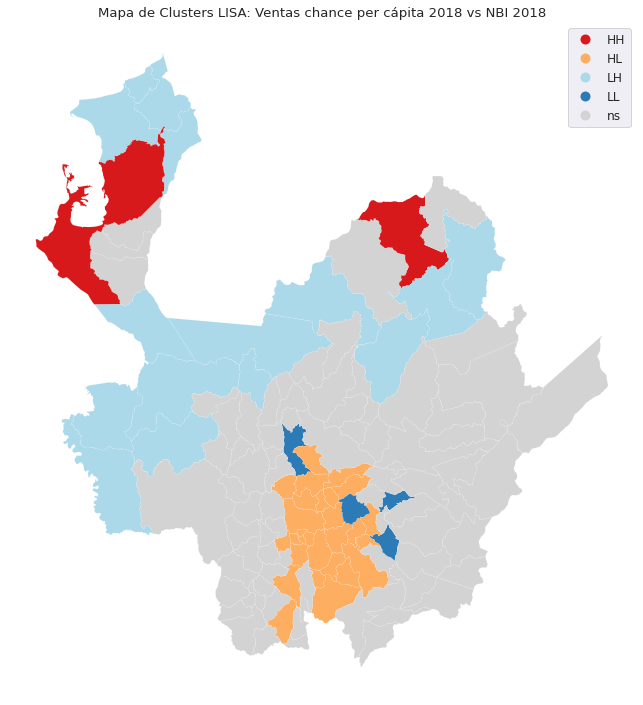

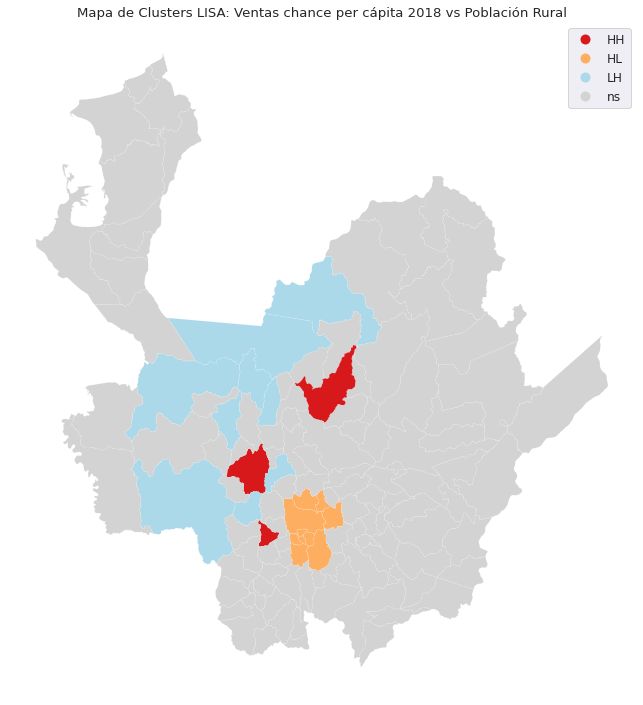

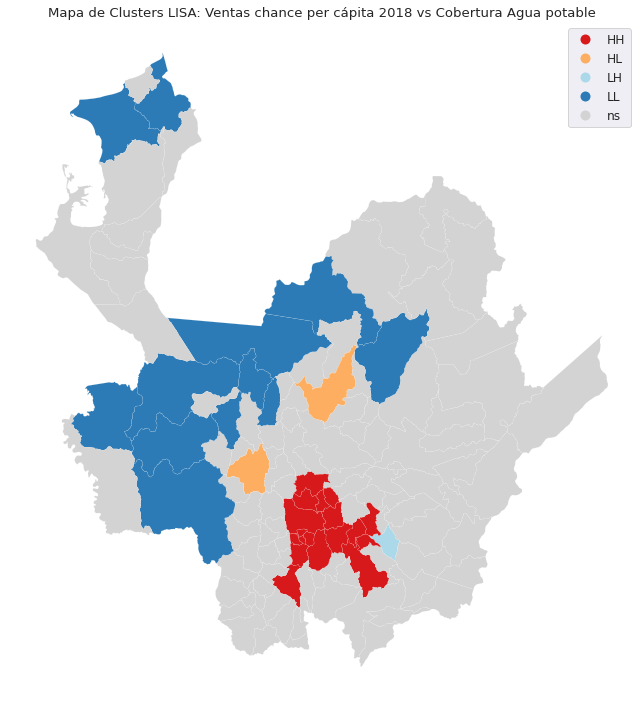

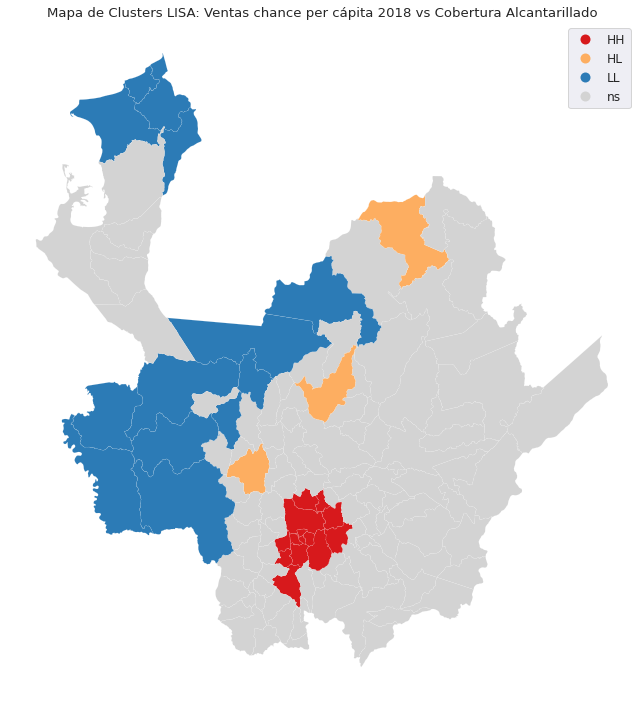

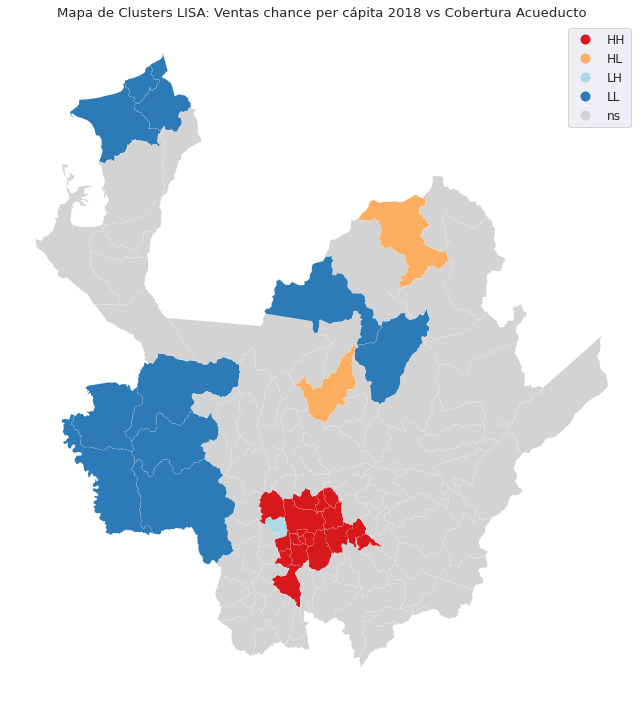

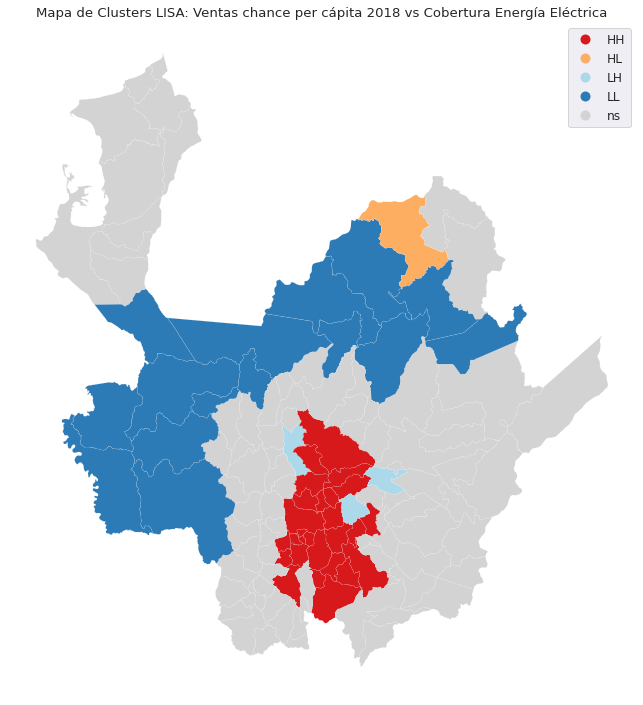

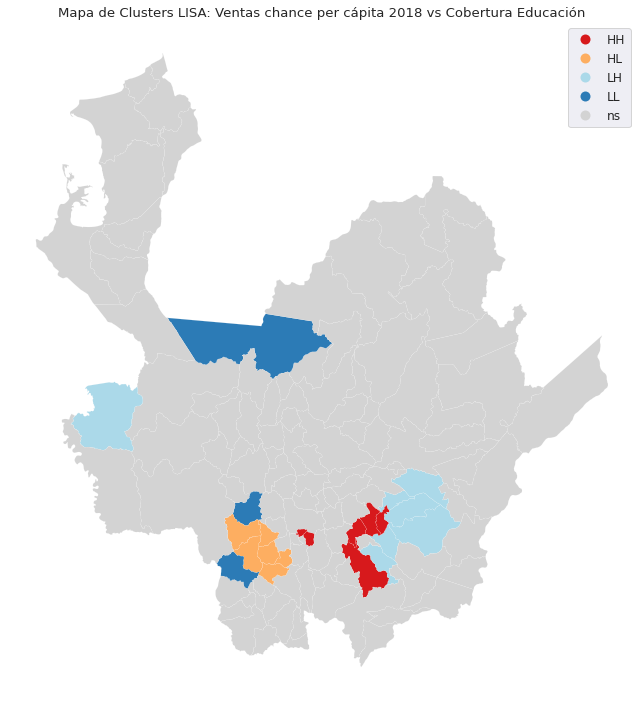

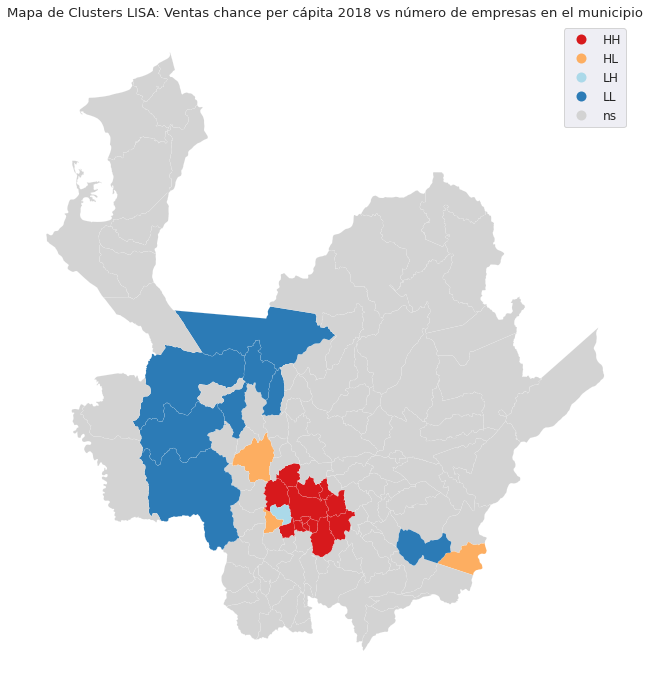

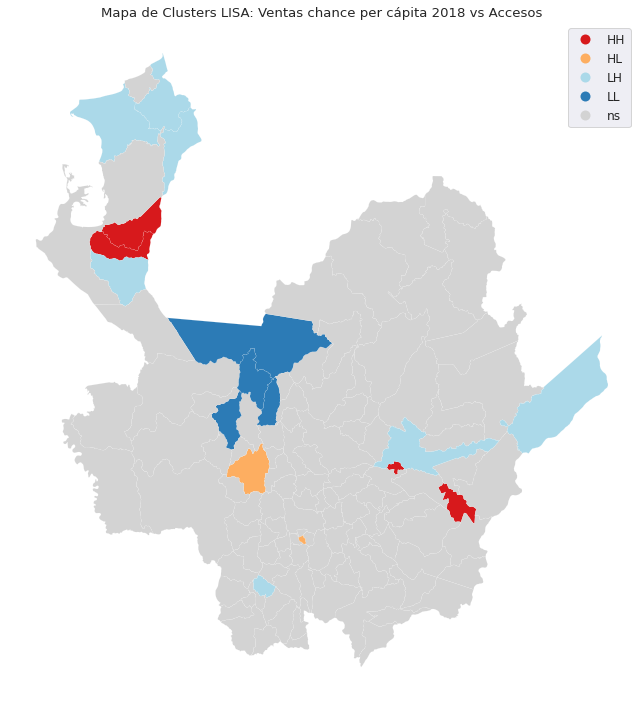

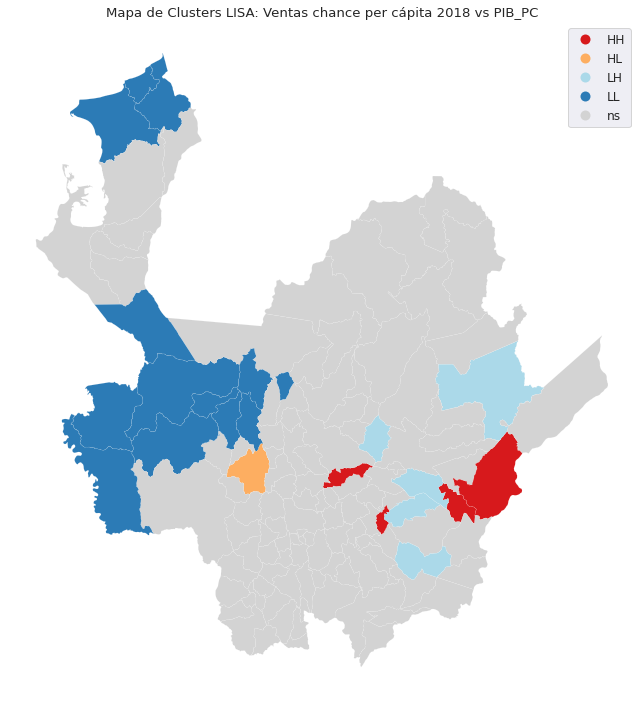

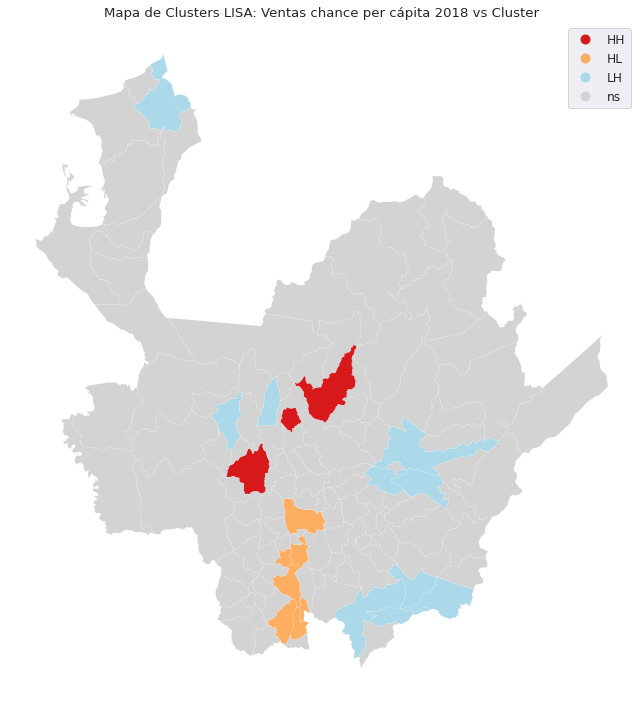

In [ ]:
with sns.axes_style("dark"):
 lisa_cluster(moran_loc_bv, Antioquia, p=0.05, figsize=(10,10))
 plt.title('Mapa de Clusters LISA: Ventas chance 2018 vs NBI 2018')
 plt.tight_layout()
 #plt.savefig('lisa_clusters.png')
 plt.show()

with sns.axes_style("dark"):
 lisa_cluster(moran_loc_bv2, Antioquia, p=0.05, figsize=(10,10))
 plt.title('Mapa de Clusters LISA: Ventas chance per cápita 2018 vs NBI 2018')
 plt.tight_layout()
 #plt.savefig('lisa_clusters.png')
 plt.show()

with sns.axes_style("dark"):
 lisa_cluster(moran_Loc_bv4, Antioquia, p=0.05, figsize=(10,10))
 plt.title('Mapa de Clusters LISA: Ventas chance per cápita 2018 vs Población Rural')
 plt.tight_layout()
 #plt.savefig('lisa_clusters.png')
 plt.show()

with sns.axes_style("dark"):
 lisa_cluster(moran_Loc_bv5, Antioquia, p=0.05, figsize=(10,10))
 plt.title('Mapa de Clusters LISA: Ventas chance per cápita 2018 vs Cobertura Agua potable')
 plt.tight_layout()
 #plt.savefig('lisa_clusters.png')
 plt.show()

with sns.axes_style("dark"):
 lisa_cluster(moran_Loc_bv6, Antioquia, p=0.05, figsize=(10,10))
 plt.title('Mapa de Clusters LISA: Ventas chance per cápita 2018 vs Cobertura Alcantarillado')
 plt.tight_layout()
 #plt.savefig('lisa_clusters.png')
 plt.show()

with sns.axes_style("dark"):
 lisa_cluster(moran_Loc_bv7, Antioquia, p=0.05, figsize=(10,10))
 plt.title('Mapa de Clusters LISA: Ventas chance per cápita 2018 vs Cobertura Acueducto')
 plt.tight_layout()
 #plt.savefig('lisa_clusters.png')
 plt.show()

with sns.axes_style("dark"):
 lisa_cluster(moran_Loc_bv8, Antioquia, p=0.05, figsize=(10,10))
 plt.title('Mapa de Clusters LISA: Ventas chance per cápita 2018 vs Cobertura Energía Eléctrica')
 plt.tight_layout()
 #plt.savefig('lisa_clusters.png')
 plt.show()

with sns.axes_style("dark"):
 lisa_cluster(moran_Loc_bv9, Antioquia, p=0.05, figsize=(10,10))
 plt.title('Mapa de Clusters LISA: Ventas chance per cápita 2018 vs Cobertura Educación')
 plt.tight_layout()
 #plt.savefig('lisa_clusters.png')
 plt.show()

with sns.axes_style("dark"):
 lisa_cluster(moran_Loc_bv10, Antioquia, p=0.05, figsize=(10,10))
 plt.title('Mapa de Clusters LISA: Ventas chance per cápita 2018 vs número de empresas en el municipio')
 plt.tight_layout()
 #plt.savefig('lisa_clusters.png')
 plt.show()

with sns.axes_style("dark"):
 lisa_cluster(moran_Loc_bv11, Antioquia, p=0.05, figsize=(10,10))
 plt.title('Mapa de Clusters LISA: Ventas chance per cápita 2018 vs Accesos')
 plt.tight_layout()
 #plt.savefig('lisa_clusters.png')
 plt.show()

with sns.axes_style("dark"):
 lisa_cluster(moran_Loc_bv12, Antioquia, p=0.05, figsize=(10,10))
 plt.title('Mapa de Clusters LISA: Ventas chance per cápita 2018 vs PIB_PC')
 plt.tight_layout()
 #plt.savefig('lisa_clusters.png')
 plt.show()

with sns.axes_style("dark"):
 lisa_cluster(moran_Loc_bv13, Antioquia, p=0.05, figsize=(10,10))
 plt.title('Mapa de Clusters LISA: Ventas chance per cápita 2018 vs Cluster')
 plt.tight_layout()
 #plt.savefig('lisa_clusters.png')
 plt.show()

Se calculan los estadísticos bivariados de moran para el *rezago espacial del deficit cuantitativo de vivienda* y la *tasa de mortalidad infantil* municipal, 

El mapa de clusters resultante muestra que los agrupamientos más comunes son 1) el (Alto-Alto) y 2) el (Bajo-Bajo), situación coherente con el valor positivo obtenido para el estadístico global de Moran bivariado. Esto significa que los vecindarios más comunes son aquellos donde se tienen municipios 1) con alta tasa de mortalidad infantil cuyos vecinos tienen alto porcentaje de hacinamiento 2) con baja tasa de mortalidad infantil cuyos vecinos tienen baja  porcentaje de hacinamiento.

En este ejercicio la tendencia general de autocorrelación espacial es positiva (HH y LLs. En el agrupamiento HH (Alto-Alto) se tendrían municipios con alto valor agregado per cápita cuyos vecinos tienen alta incidencia de la pobreza multidimiensional rural. En el LL (Bajo-Bajo) se tendría la situación opuesta.

Hay excepciones donde se pueden ver valores atípicos donde se puede observar cluster donde la variable refrencia tiene alto nivel de deficit habitacional pero que sus vecinos tienen baja tasa de mortalidad infantil. Esta concentración conocida como Alto-bajo está en la zona occidental de la ciduad aledaña aBogotá.

En el mismo sentido, se encuentran casos de baja deficit de hacinamiento pero con vecinos con altos tasas de mortalidad infantil justo en la línea donde se concentra el cluster de alto a alto.

En este sentido se tiene la misma interpretación que el anterior, cambiando las zonas donde se encuentra el cluster Bajo Alto y Alto-Bajo invirtiendose con el anterior gráfica donde sus comportamientos son al revés.

También varía la ubicación de la zona Bajo-Bajo, mientras que la Alto-Alto se mantiene relativamente igual.

In [ ]:
moran_loc_bv3 = Moran_Local_BV(Antioquia.VentaPerCapita2018, Antioquia.Pob_Rur, wqs)